# Avacado Price Prediction

## Data Loading

In [42]:
# Importing dataset via kaggle

!kaggle datasets download -d smokingkrils/avacado-price-prediction

Dataset URL: https://www.kaggle.com/datasets/smokingkrils/avacado-price-prediction
License(s): unknown
100%|█████████████████████████████████████████| 629k/629k [00:06<00:00, 104kB/s]
100%|█████████████████████████████████████████| 629k/629k [00:06<00:00, 104kB/s]


In [1]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Avacado price prediction/avacado-price-prediction.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Avacado price prediction')
zip_ref.close()

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Avocado.csv')

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.shape

(18249, 14)

In [5]:
df.size

255486

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


In [8]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

## Data Visualization

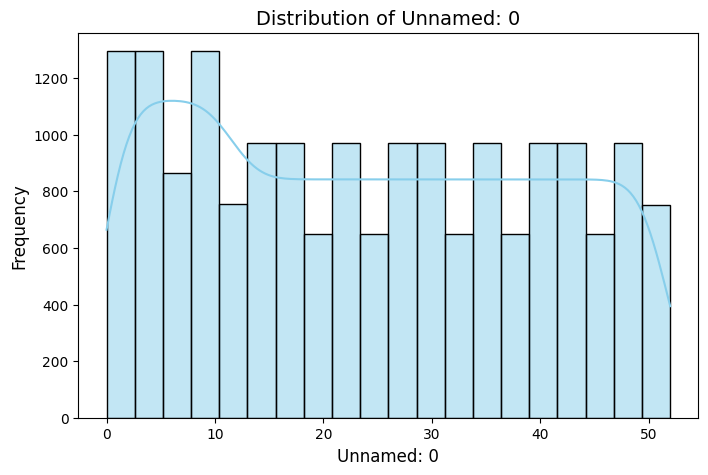

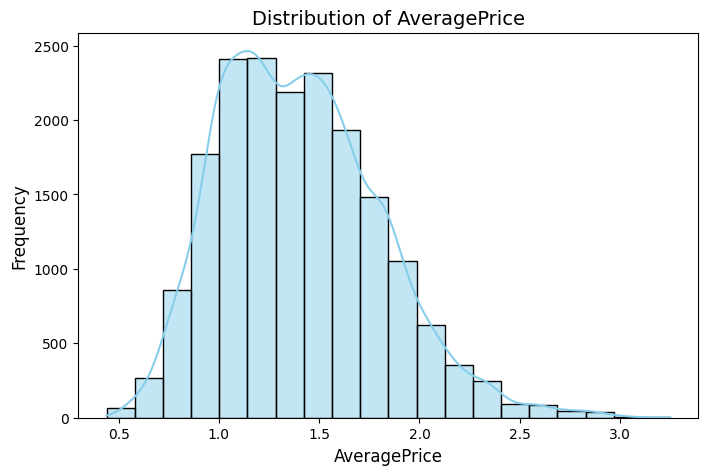

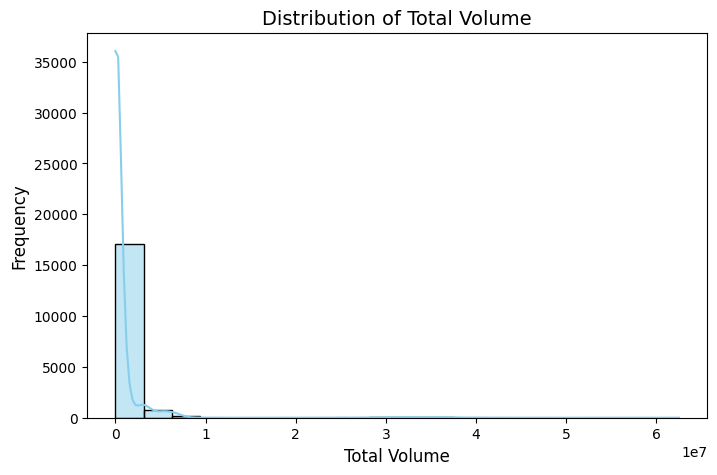

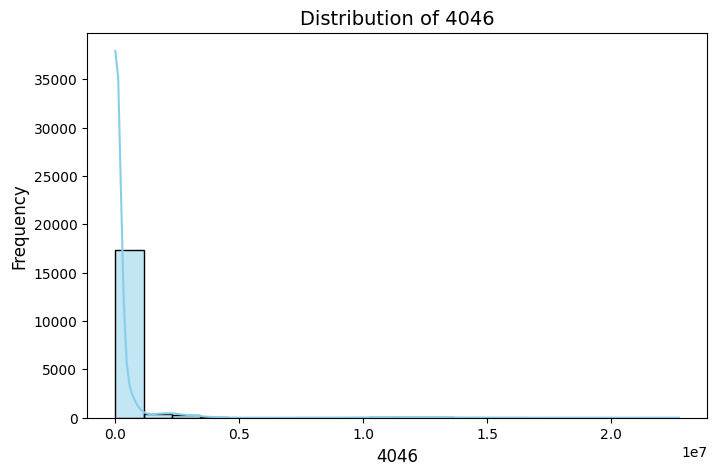

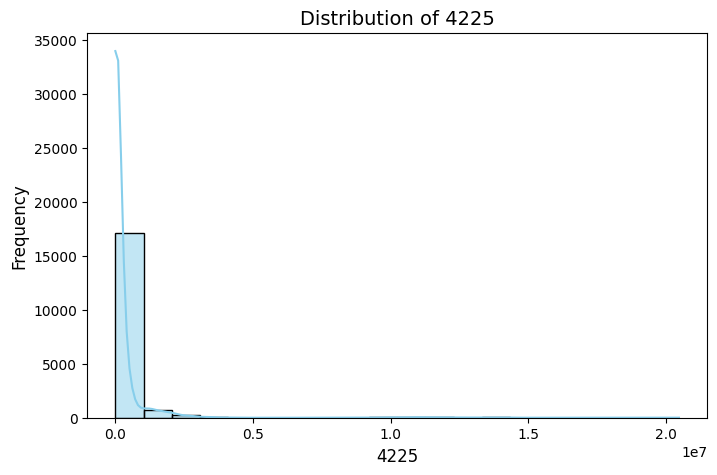

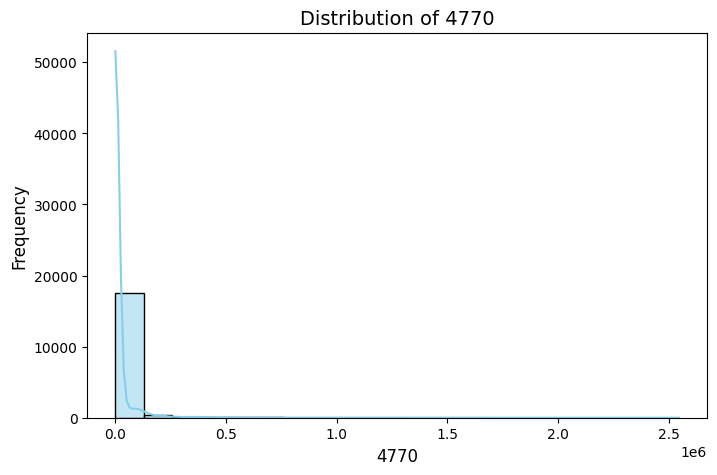

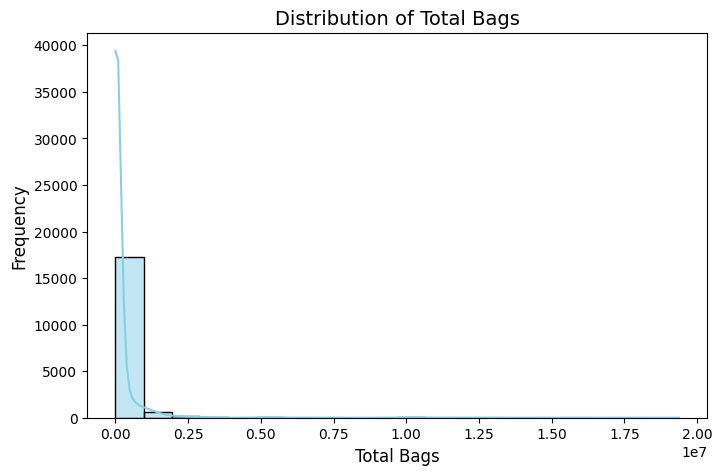

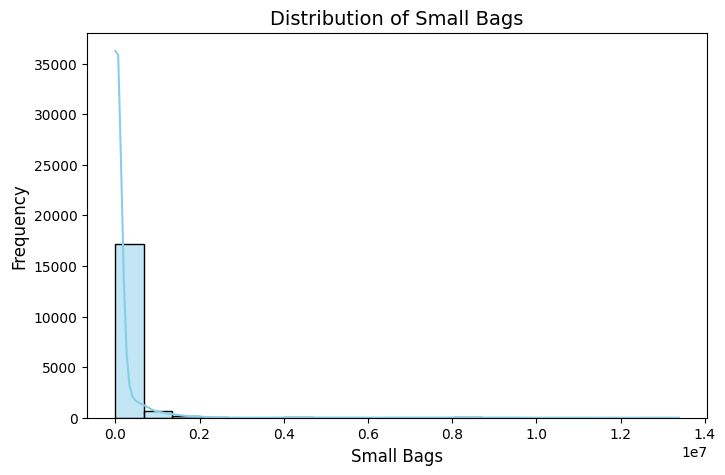

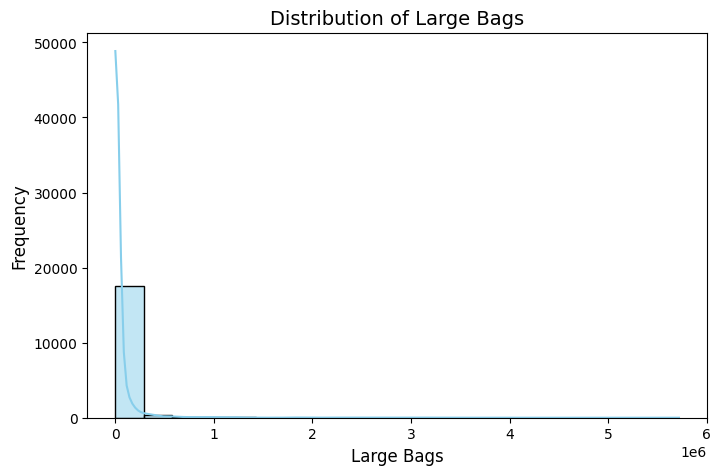

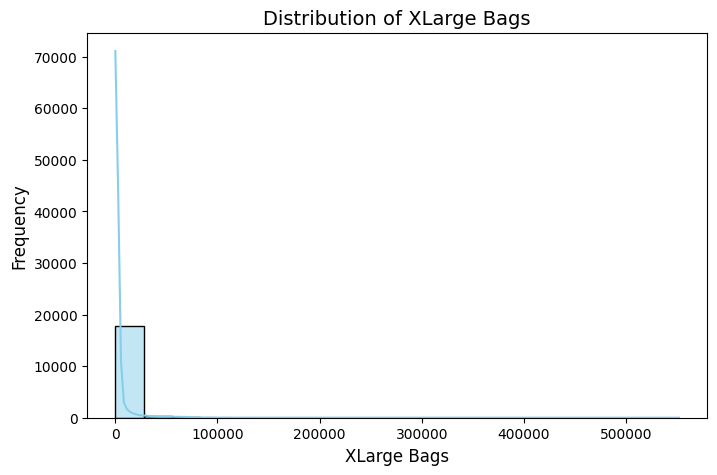

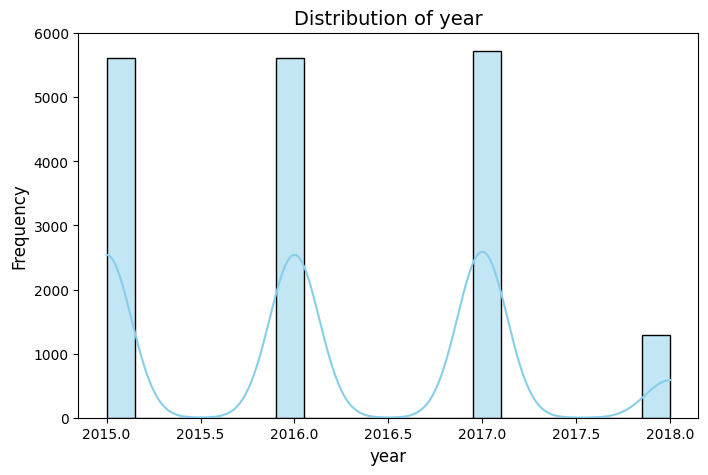

In [11]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# 🔹 Histogram for each numerical column

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=20, kde=True, color="skyblue", edgecolor="black")
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.show()

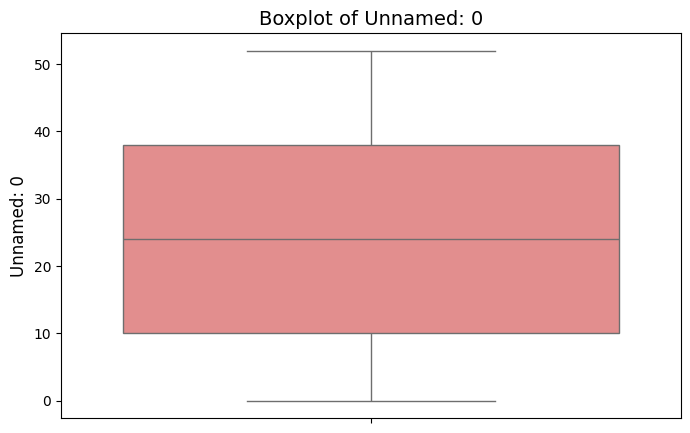

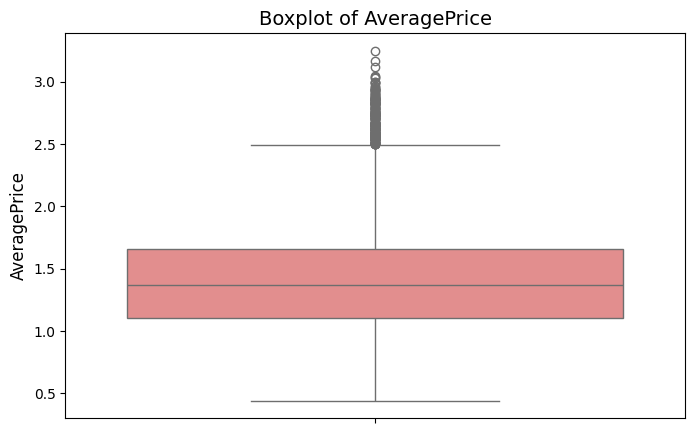

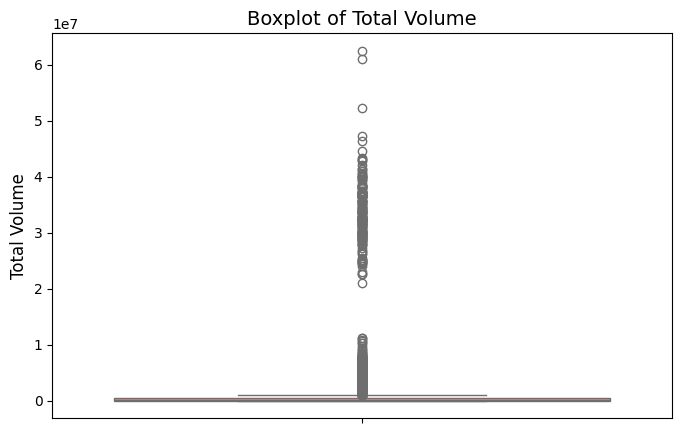

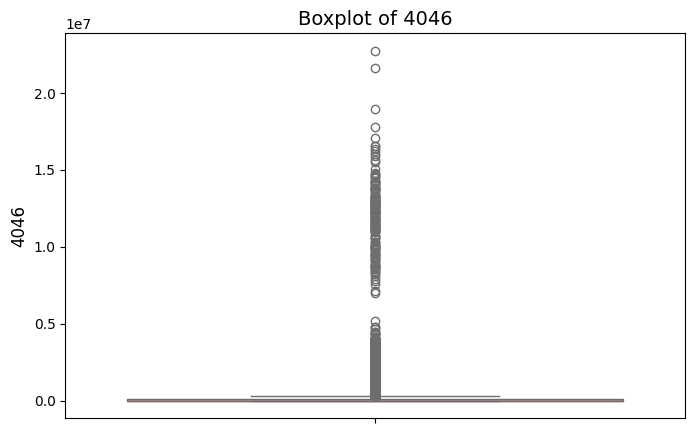

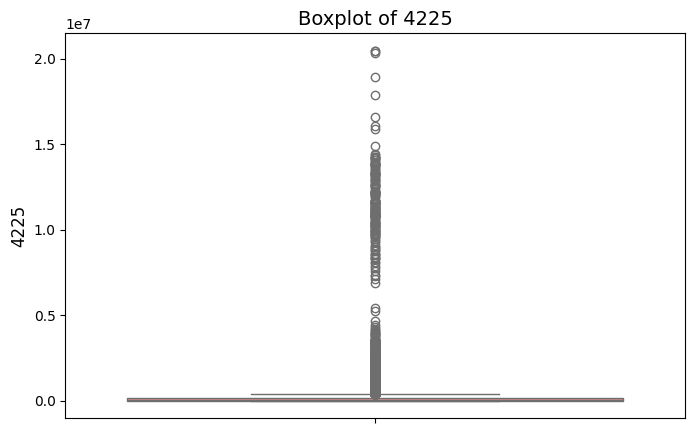

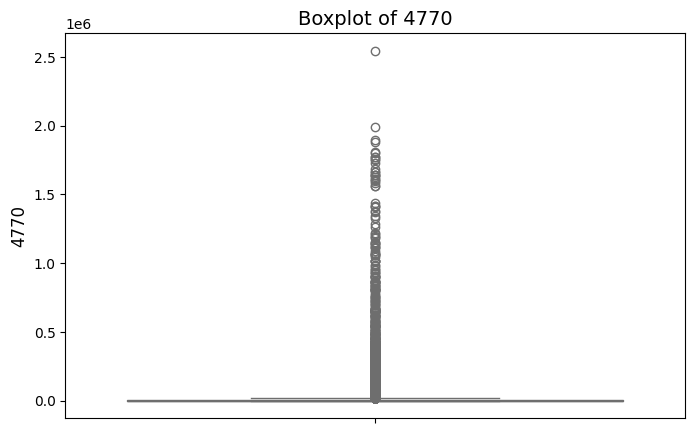

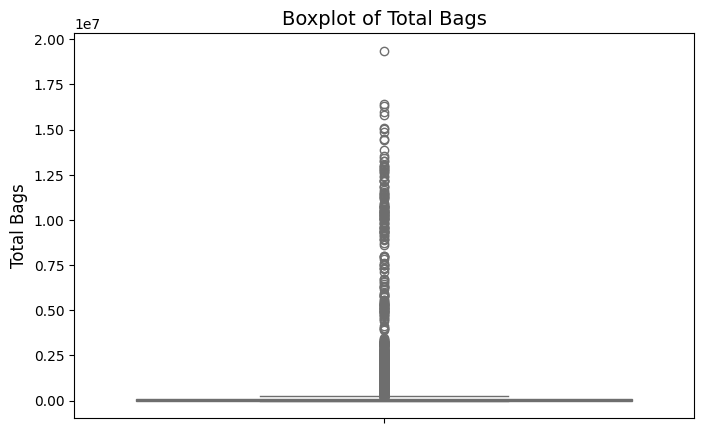

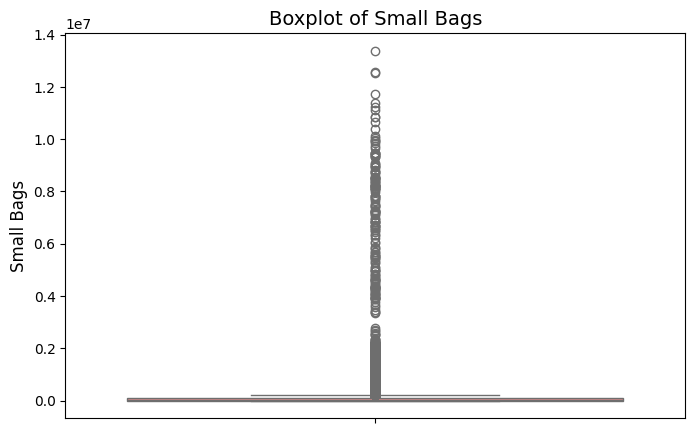

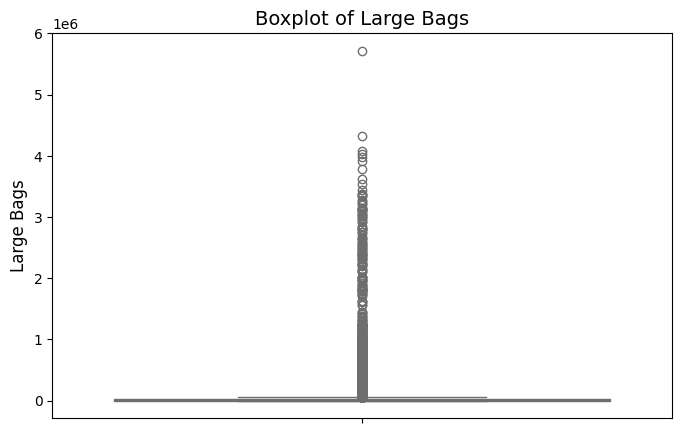

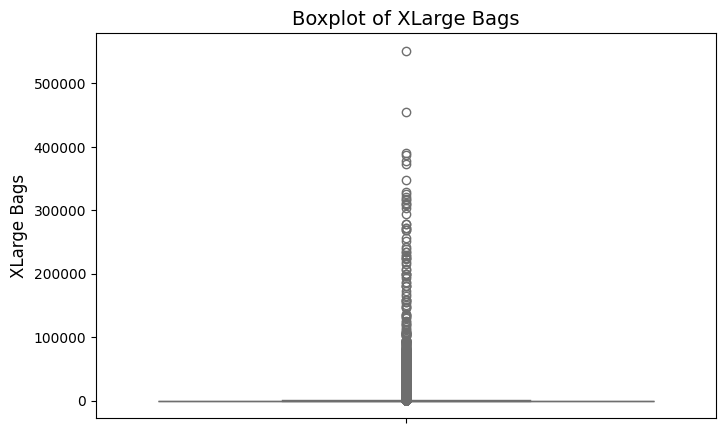

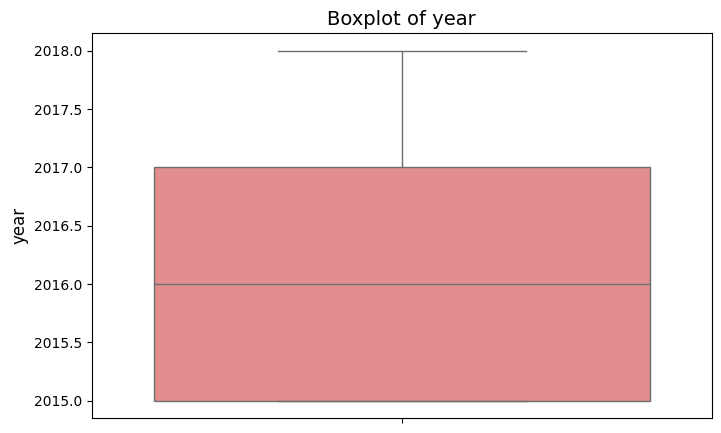

In [12]:
# Boxplots for outlier detection

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[col], color="lightcoral")
    plt.ylabel(col, fontsize=12)
    plt.title(f"Boxplot of {col}", fontsize=14)
    plt.show()

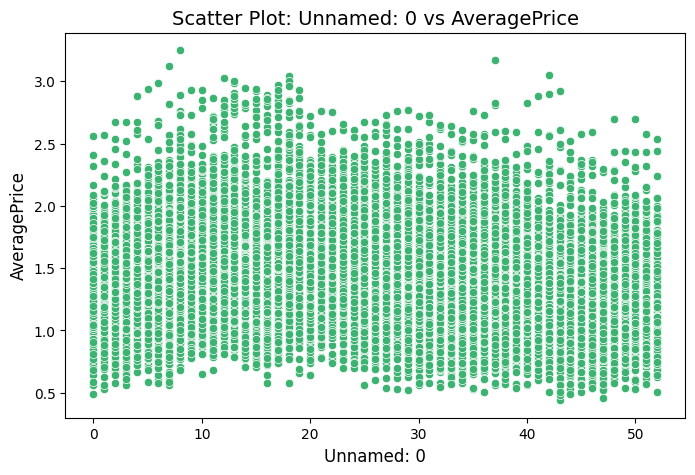

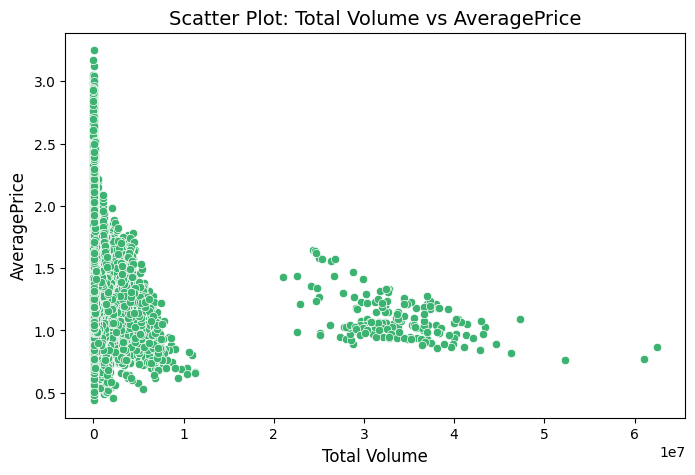

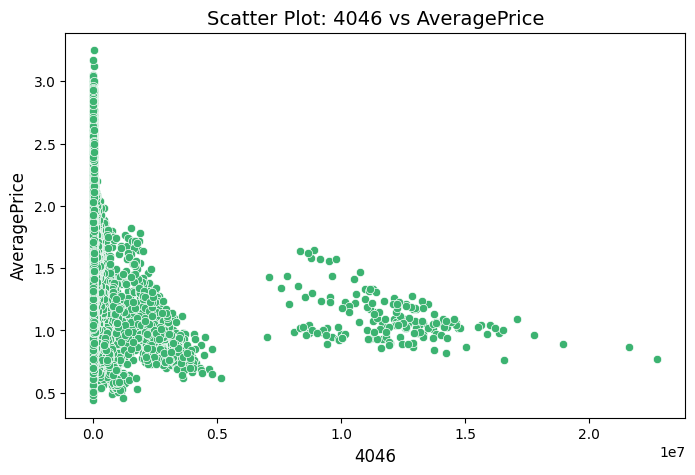

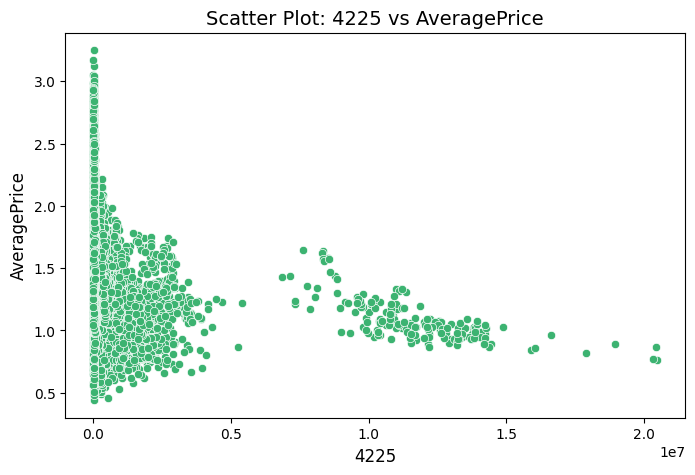

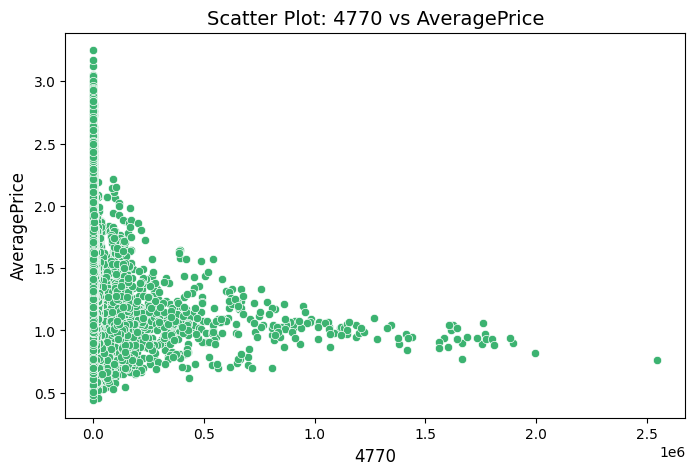

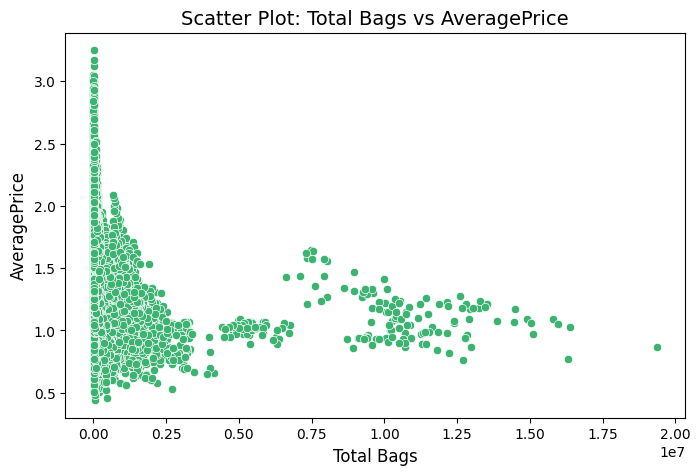

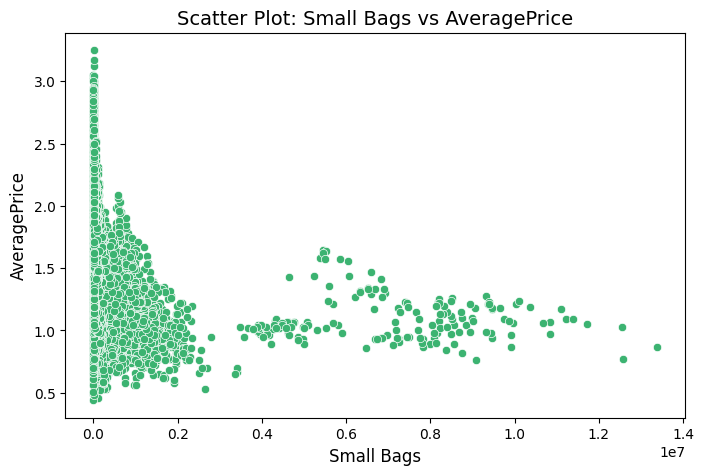

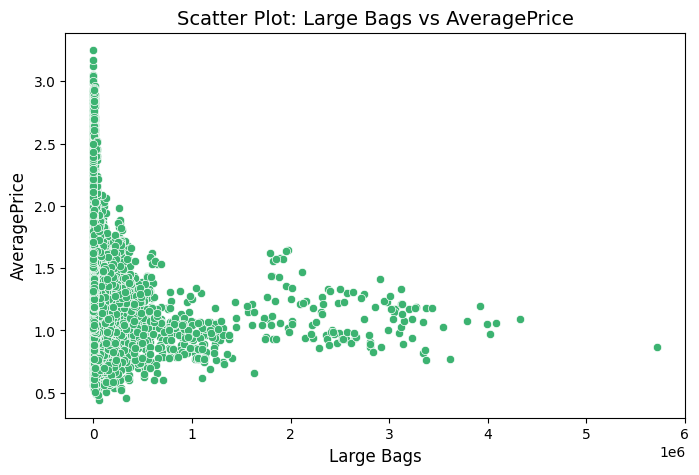

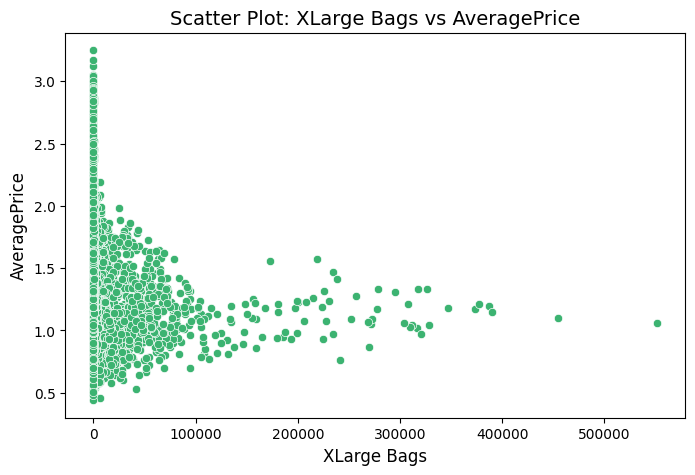

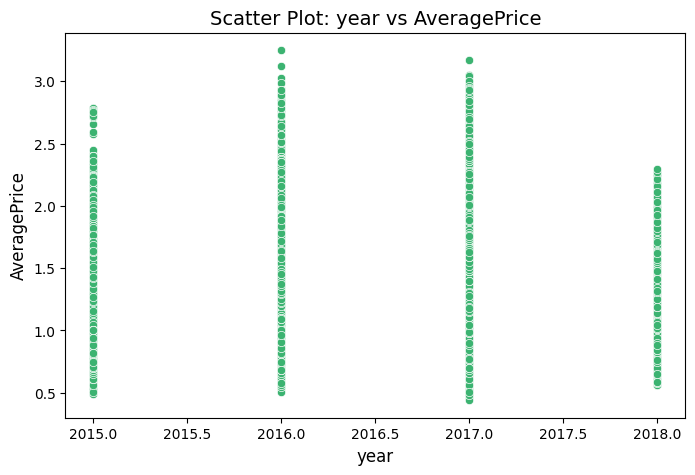

In [13]:
# Scatter plots to analyze numerical relationships

for col in numerical_cols:
    if col != "AveragePrice":  
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=df[col], y=df["AveragePrice"], color="mediumseagreen")
        plt.xlabel(col, fontsize=12)
        plt.ylabel("AveragePrice", fontsize=12)
        plt.title(f"Scatter Plot: {col} vs AveragePrice", fontsize=14)
        plt.show()

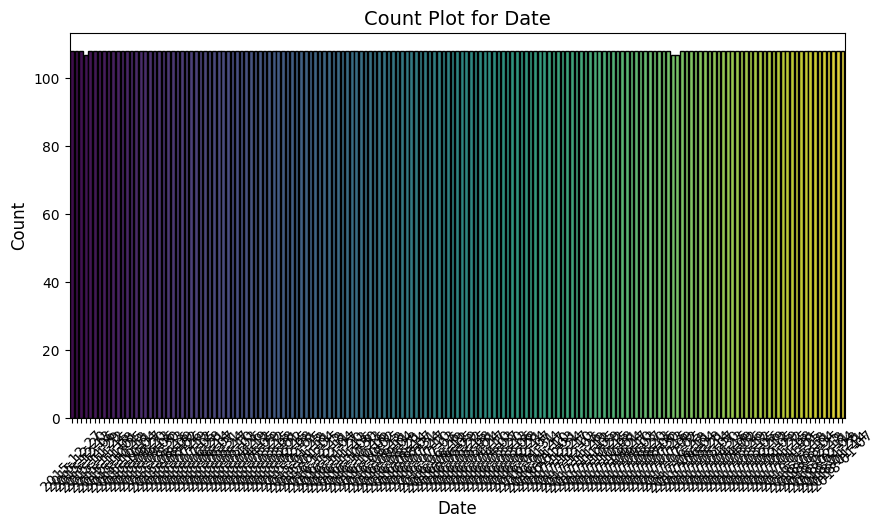

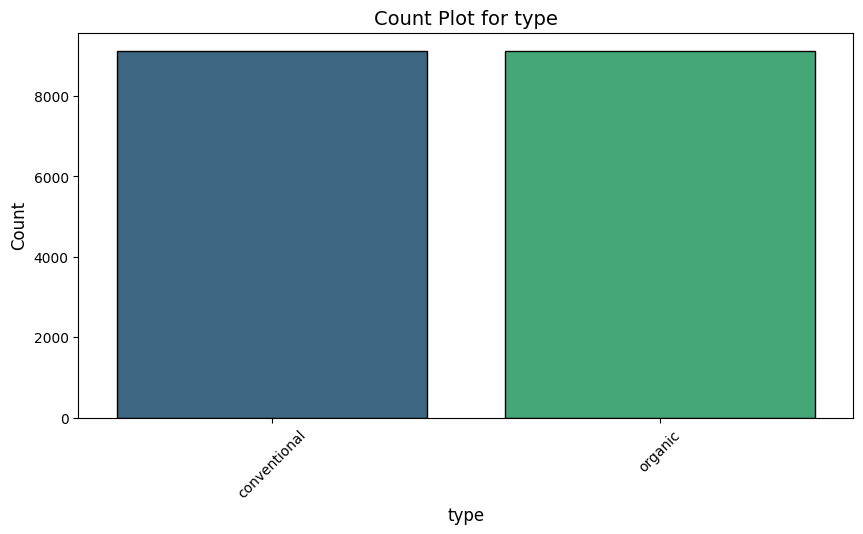

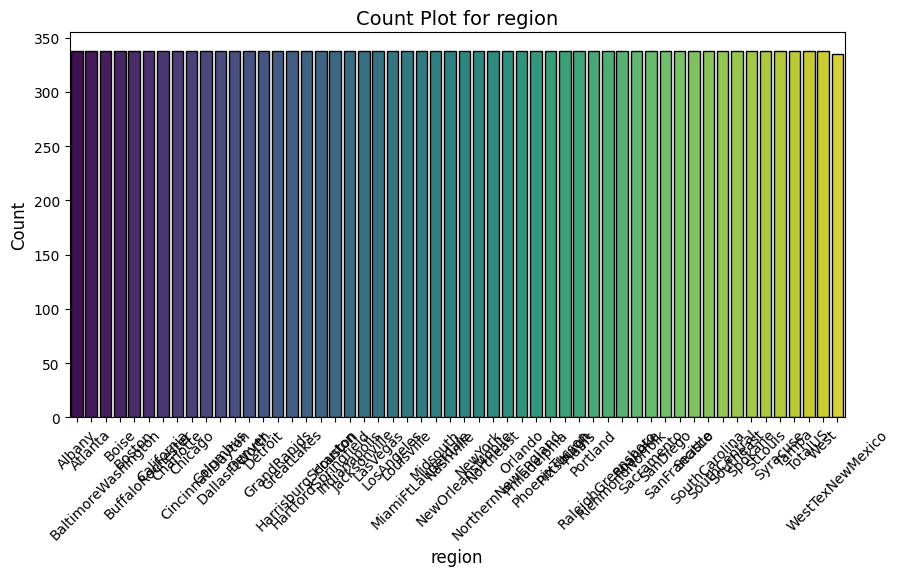

In [14]:
# 🔹 Count plots for categorical columns

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[col], palette="viridis", edgecolor="black")
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.title(f"Count Plot for {col}", fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

## Data Preprocessing

In [ ]:
# Dropping unwanted column

df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
# Date conversion

df["Date"] = pd.to_datetime(df["Date"])

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Weekday"] = df["Date"].dt.day_name()
df["Quarter"] = df["Date"].dt.quarter
df["Week_Number"] = df["Date"].dt.isocalendar().week 

In [17]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [18]:
X = df.drop(columns=['AveragePrice'])
y = df['AveragePrice']

In [19]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [20]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [21]:
Linear_reg = LinearRegression()
Ride_reg= Ridge()
XGBoost = XGBRegressor()
Random_forest = RandomForestRegressor()
Ada_boost = AdaBoostRegressor()
Grad_boost = GradientBoostingRegressor()
Bagging= BaggingRegressor()
Decision_tree = DecisionTreeRegressor()
Svr = SVR()
Knn = KNeighborsRegressor()

In [22]:
model_li = [Ride_reg, XGBoost, Random_forest, Ada_boost, Grad_boost, Bagging, Decision_tree, Svr, Knn]

Score = []
for model in model_li:
    model.fit(X_train, y_train)
    Score.append(r2_score(y_test, model.predict(X_test)))

Score

[0.5509253032891914,
 0.9195603728294373,
 0.9080939566686366,
 0.5864354261444942,
 0.768552436412409,
 0.890842784533988,
 0.7881366538428394,
 0.4282226868072758,
 0.7416125292940714]

## Model Evaluation

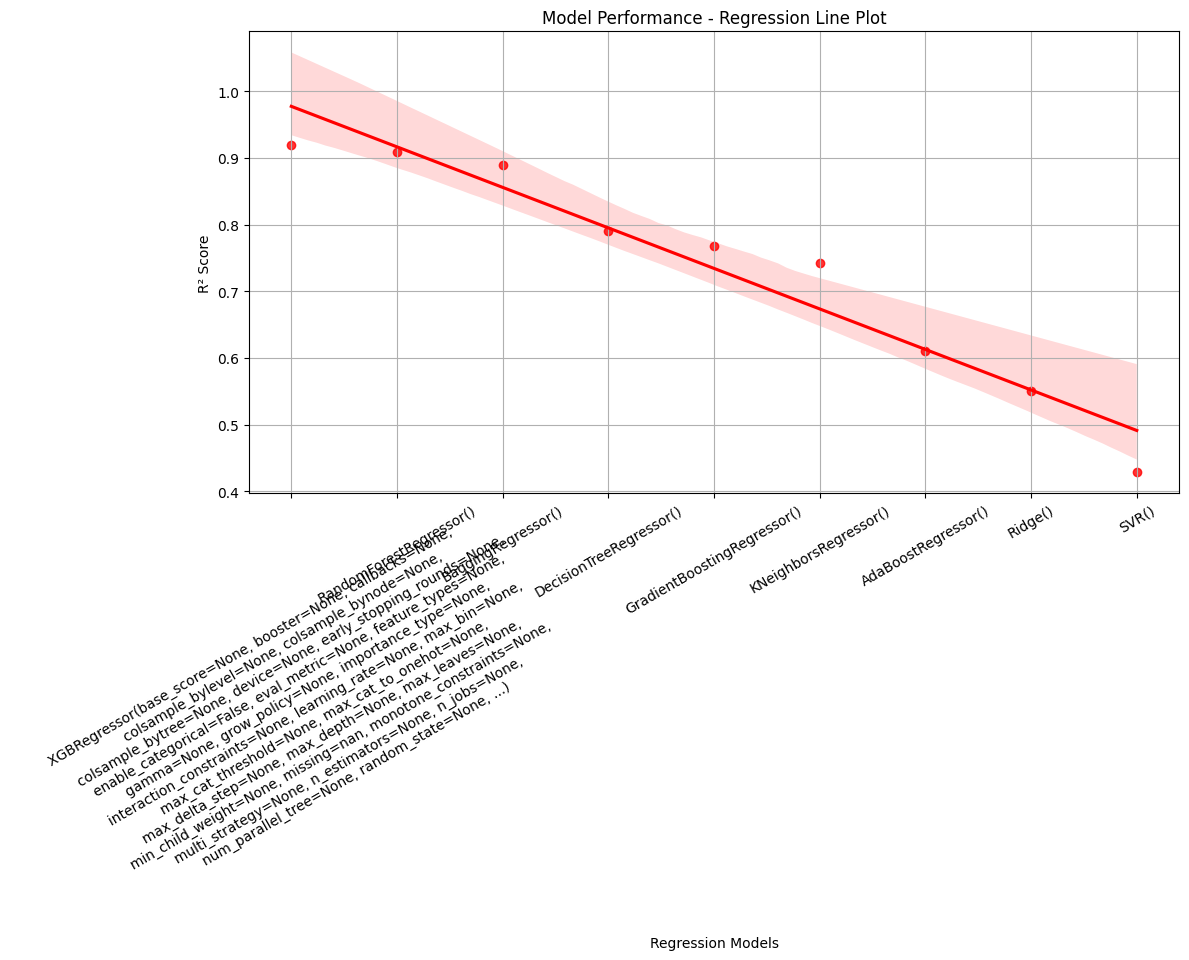

In [23]:
model_li = [Ride_reg, XGBoost, Random_forest, Ada_boost, Grad_boost, Bagging, Decision_tree, Svr, Knn]

Score = []
for model in model_li:
    model.fit(X_train, y_train)
    Score.append(r2_score(y_test, model.predict(X_test)))

df_scores = pd.DataFrame({'Model': model_li, 'R2 Score': Score})
df_scores = df_scores.sort_values(by='R2 Score', ascending=False)

# Regression line

plt.figure(figsize=(12, 6))
sns.regplot(x=list(range(len(df_scores))), y=df_scores['R2 Score'],
            scatter=True, marker="o", fit_reg=True, color="red")

plt.xticks(range(len(df_scores)), df_scores['Model'], rotation=30)
plt.xlabel("Regression Models")
plt.ylabel("R² Score")
plt.title("Model Performance - Regression Line Plot")
plt.grid(True)
plt.show()